# ELE 435/535 Computational Lab 3 

### Due Date: 10/8/2018 (Monday) 11:30 PM

### Name: 

# Getting started with Scikit-learn

# 1 -- Iris flowers dataset:

Scikit-learn includes some well-known datasets, one of which is the Iris flowers dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set). It contains 4 attributes (petal length and width, sepal length and width) about Iris flower species ("Setosa", "Versicolor", or "Virginica"). We would like to guess Iris species based on the attribute measures. 


1) importorting required Python packages:

In [117]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline 

2) Importing Iris dataset:

In [118]:
from sklearn import datasets
Iris_data = datasets.load_iris()
data_X = Iris_data.data #Data matrix
data_labels = Iris_data.target #Labels

3) Print the size of data array (data_X). How many labels does exist in the dataset? How many features does each Iris sample have? Hint: You can use X.shape command.

In [119]:
data_X.shape

(150, 4)

# -Size of data_X is 150x4. 
# -There are a total of 150 labels which can take one out of three possible values of flower species. 
# - Each iris sample has 4 features

4) Now, split the data into training/test sets using "train_test_split" command in scikit-learn. Consider 80% of the data to be training and the rest as the test data. Hint: "train_test_split" is a class in cross_validation subpackage of scikit_learn.

In [122]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_labels, 
                                                    test_size=0.2, random_state=0)
    
                        

5) What does "random_state" argument of "train_test_split" class do? Why would it be useful?

## random_state is the seed used for random number generation 

6) Select only the first two features for training/test data. Then, plot how training/test data are distributed in two dimensions. Use different colors for instances from different classes. Hint: "plt.scatter" will be helpful.

In [123]:
X_train_first_two_features = data_X[:,0:2]

In [124]:
X_train_first_two_features.shape

(150, 2)

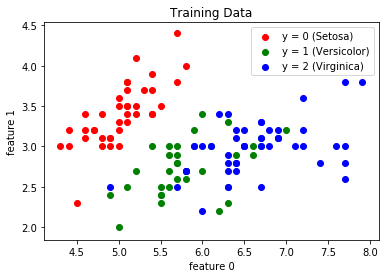

In [129]:
# plot training data
X_train_first_two_features = X_train[:,0:2]
plt.scatter(X_train_first_two_features[y_train==0,0], X_train_first_two_features[y_train==0,1], color='r',label='y = 0')
plt.scatter(X_train_first_two_features[y_train==1,0], X_train_first_two_features[y_train==1,1], color='g',label='y = 1')
plt.scatter(X_train_first_two_features[y_train==2,0], X_train_first_two_features[y_train==2,1], color='b',label='y = 2')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.gca().legend(('y = 0 (Setosa)', 'y = 1 (Versicolor)', 'y = 2 (Virginica)'))
plt.title("Training Data")


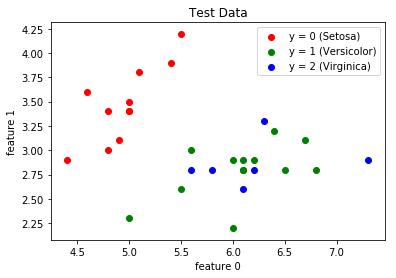

In [130]:
# plot training data
X_test_first_two_features = X_test[:,0:2]
plt.scatter(X_test_first_two_features[y_test==0,0], X_test_first_two_features[y_test==0,1], color='r',label='y = 0')
plt.scatter(X_test_first_two_features[y_test==1,0], X_test_first_two_features[y_test==1,1], color='g',label='y = 1')
plt.scatter(X_test_first_two_features[y_test==2,0], X_test_first_two_features[y_test==2,1], color='b',label='y = 2')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend('Test Data')
plt.gca().legend(('y = 0 (Setosa)', 'y = 1 (Versicolor)', 'y = 2 (Virginica)'))
plt.title("Test Data")


7) Dataset standardization: Scale each feature across training data to have zero mean and unit variance using numpy. (For the training data with 4 features). Hint: You may use np.mean(), and np.std() commands. Make sure that you compute mean across the correct axis.

Afterwards, standardize the test set using the computed training mean and variace.

In [40]:
mean_train = np.mean(X_train,axis=0)
std_train = np.std(X_train,axis=0)
X_train_std = (X_train - mean_train)/std_train

In [41]:
std_train

array([0.84688604, 0.43010335, 1.77745116, 0.7732826 ])

In [42]:
# Standardize the test data
X_test_std = (X_test - mean_train)/std_train

8) Now, perform dataset standardization using Scikit-learn. Hint: You may find "StandardScalar" class from "preprocessing" sub-package of scikit-learn helpful.

In [134]:
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()
standardization.fit(X_train)
X_train_standardized = standardization.transform(X_train)
X_test_standardized  = standardization.transform(X_test)

9) PCA with scikit-learn: Project the standardized data (with 4 features) onto the span of the first two principal components. Hint: you may use PCA command from scikit_learn.

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_standardized_projected = pca.fit_transform(X_train_standardized)
X_test_standardized_projected = pca.transform(X_test_standardized)

# X_train_standardized_projected

10) Visualize the projected data in two dimension (use the same colors as the ones used in step 6).

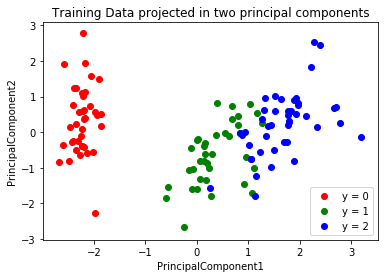

In [136]:
# plot training data
plt.scatter(X_train_standardized_projected[y_train==0,0], X_train_standardized_projected[y_train==0,1], color='r',label=' 0')
plt.scatter(X_train_standardized_projected[y_train==1,0], X_train_standardized_projected[y_train==1,1], color='g',label='1')
plt.scatter(X_train_standardized_projected[y_train==2,0], X_train_standardized_projected[y_train==2,1], color='b',label='2')
plt.xlabel('PrincipalComponent1')
plt.ylabel('PrincipalComponent2')
plt.legend('Training Data')
plt.gca().legend(('y = 0', 'y = 1', 'y = 2'))
plt.title("Training Data projected in two principal components")


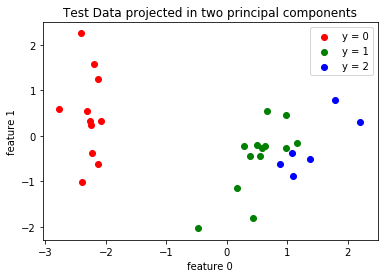

In [137]:
# plot test data
plt.scatter(X_test_standardized_projected[y_test==0,0], X_test_standardized_projected[y_test==0,1], color='r',label='y = 0')
plt.scatter(X_test_standardized_projected[y_test==1,0], X_test_standardized_projected[y_test==1,1], color='g',label='y = 1')
plt.scatter(X_test_standardized_projected[y_test==2,0], X_test_standardized_projected[y_test==2,1], color='b',label='y = 2')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend('Test Data')
plt.gca().legend(('y = 0', 'y = 1', 'y = 2'))
plt.title("Test Data projected in two principal components")


# Implementing different classifiers:

# 1) K-nearest neighbor classifier:

implement k-nearest clasifier using scikit-learn for k=1,2,...,10. Hint: you will find http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
 helpful. 
        
Plot training accuracy versus k. Plot test accuracy versus k.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
train_data = X_train
test_data = X_test
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)..
    neigh.fit(train_data,y_train)
    accuracy_train = neigh.score(X = train_data, y = y_train)
    accuracy_test = neigh.score(test_data,y_test)
    training_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

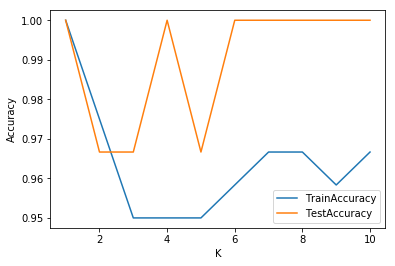

In [48]:
kValues = [j for j in range(1,11)]
plt.plot(kValues, training_accuracy, kValues, test_accuracy)
plt.gca().legend(('TrainAccuracy', 'TestAccuracy'))
plt.xlabel('K')
plt.ylabel('Accuracy')

# 2) Nearest mean classifier:

Implement nearest mean classifier and report the training and test accuracies. Hint: You will find the following link helpful: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [49]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
training_accuracy = []
test_accuracy = []
train_data = X_train
test_data = X_test
nCentroid = NearestCentroid(metric = 'euclidean')
nCentroid.fit(train_data,y_train)
accuracy_train = nCentroid.score(X = train_data, y = y_train)
accuracy_test = nCentroid.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [50]:
training_accuracy

[0.9416666666666667]

In [51]:
test_accuracy

[0.9]

# 3) Gaussian Naive Bayes:

Implement Gaussian Naive Bayes classifier using scikit-learn. Hint: You will find http://scikit-learn.org/stable/modules/naive_bayes.html helpful.

In [52]:
from sklearn.naive_bayes import GaussianNB
training_accuracy = []
test_accuracy = []
train_data = X_train
test_data = X_test
gnb = GaussianNB()
gnb.fit(train_data,y_train)
accuracy_train = gnb.score(X = train_data, y = y_train)
accuracy_test = gnb.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [53]:
training_accuracy

[0.95]

In [54]:
test_accuracy

[0.9666666666666667]

# 2-- MNIST Dataset

# 1) K-nearest neighbor classifier:
Implement k-nearest neighbor classifer for MNIST dataset where k = 1, 2, 3 (use the files that were given for HW1). You will use scikit-learn for this part but make sure that the data has the format that scikit-learn expects (training samples are in rows of the training matrix not in columns). Plot training/test accuracy as a function of k. (It takes a while to run this part)  http://scikit-learn.org/stable/modules/generate/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [108]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='uint8')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='uint8')

train_data = train_data.T
test_data = test_data.T

In [109]:
y_train = [] 
for j in range (0,10):
    y_train += [j]*1000
y_test = [] 
for j in range (0,10):
    y_test += [j]*100

In [110]:
# standardize the data
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()
standardization.fit(train_data)
X_train_standardized = standardization.transform(train_data)
X_test_standardized  = standardization.transform(test_data)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [113]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# train_data = X_train_standardized
# test_data = X_test
for k in range(1,4):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data,y_train)
    accuracy_train = neigh.score(train_data, y = y_train)
    accuracy_test = neigh.score(test_data,y_test)
    training_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

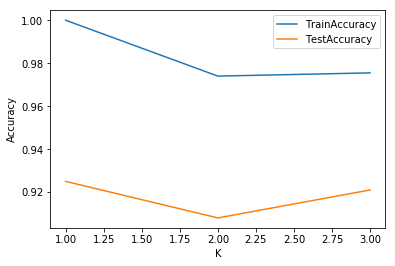

In [115]:
kValues = [j for j in range(1,4)]
plt.plot(kValues, training_accuracy, kValues, test_accuracy)
plt.gca().legend(('TrainAccuracy', 'TestAccuracy'))
plt.xlabel('K')
plt.ylabel('Accuracy')

# 2) Nearest centroid classifier:

implement nearest class mean classifier and report the training and test accuracies (using scikit-learn). http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [103]:
# # standardize the data
# from sklearn import preprocessing
# standardization = preprocessing.StandardScaler()
# standardization.fit(train_data)
# X_train_standardized = standardization.transform(train_data)
# X_test_standardized  = standardization.transform(test_data)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [72]:
training_accuracy = []
test_accuracy = []
# train_data = X_train
# test_data = X_test
nCentroid = NearestCentroid(metric = 'euclidean')
nCentroid.fit(train_data,y_train)
accuracy_train = nCentroid.score(X = train_data, y = y_train)
accuracy_test = nCentroid.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [73]:
training_accuracy

[0.8038]

In [74]:
test_accuracy

[0.767]

# 3) Gaussian Naive Bayes Classifier:

implement Gaussian naive Bayes classifer and report the training and test accuracies. (http://scikit-learn.org/stable/modules/naive_bayes.html)

In [75]:
from sklearn.naive_bayes import GaussianNB
training_accuracy = []
test_accuracy = []
gnb = GaussianNB()
gnb.fit(train_data,y_train)
accuracy_train = gnb.score(X = train_data, y = y_train)
accuracy_test = gnb.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [76]:
training_accuracy

[0.588]

In [77]:
test_accuracy

[0.549]

# 4) PCA with scikit-learn:

Project the training data onto the span of first two principal components. Then visualize how the projected data is distributed in two dimensions. Use different colors for different digits.

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_standardized_projected = pca.fit_transform(X_train_standardized)
X_test_standardized_projected = pca.transform(X_test_standardized)

# X_train_standardized_projected

In [79]:
y_train_array  =np.array(y_train)
y_test_array = np.array(y_test)

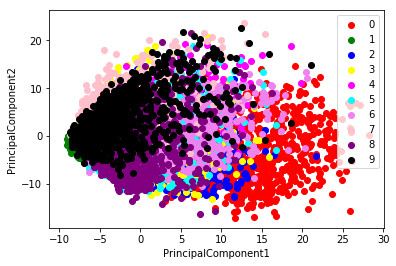

In [80]:
# plot training data
colors = ['red','green','blue','yellow','magenta','cyan','violet','pink','purple','black']
for digit in range(0,10):
    
    plt.scatter(X_train_standardized_projected[y_train_array==digit,0], X_train_standardized_projected[y_train_array==digit,1],
                color=colors[digit])
plt.xlabel('PrincipalComponent1')
plt.ylabel('PrincipalComponent2')
plt.legend('Training Data')
plt.gca().legend(('0', '1','2','3','4','5','6','7','8','9'))

# 3 -- Cifar10 Dataset

cifar10 is one of the most widely used datasets for image recognition. It consists of 32*32 color images of 10 different objects ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Please take a look at the following page for more information: https://www.cs.toronto.edu/~kriz/cifar.html.
In this part, we are going to use just one subset of the whole dataset. Please download the file ("data_batch_1") from blackboard and impot it to numpy using the following function.

In [138]:
# def unpickle(file):
#     import cPickle
#     fo = open(file,'rb')
#     dictionary = cPickle.load(fo)
#     fo.close()
#     return dictionary
def unpickle(file):
    import pickle
    fo = open(file,'rb')
    dictionary = pickle.load(fo,encoding='latin1')
    fo.close()
    return dictionary
data_batch_1 = unpickle("data_batch_1")
data = data_batch_1['data']
labels = np.asarray(data_batch_1['labels'])
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
'horse', 'ship', 'truck']

1) Print the dimension of data array. Why is the second dimension different from 32*32?

In [139]:
data.shape

(10000, 3072)

## The dimension chaged as the data has three channels RGB, so the total number of components is 1024*3 = 3072

2) Plot one image (it can be any of them) from each class using the following function. Make sure that the title of the image is the name of the corresponding object. Hint: You may find np.where command helpful.

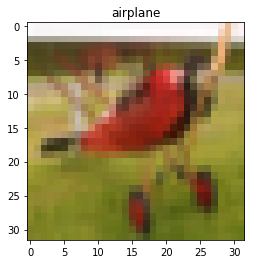

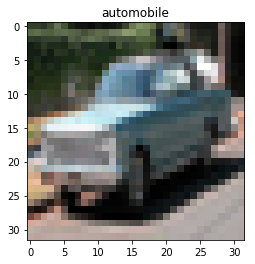

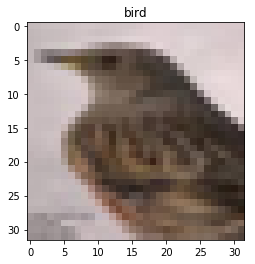

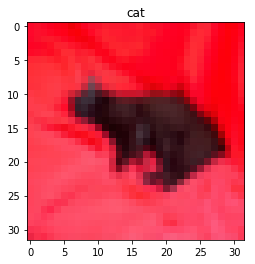

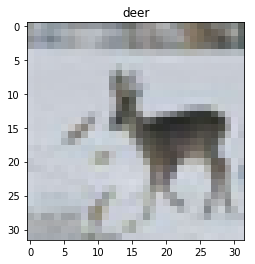

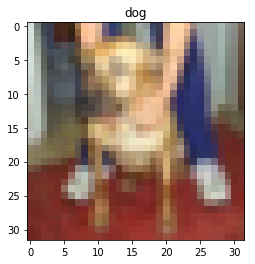

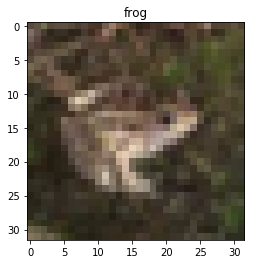

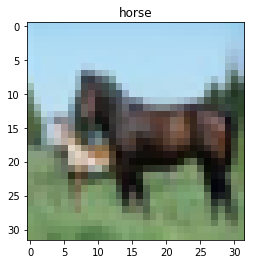

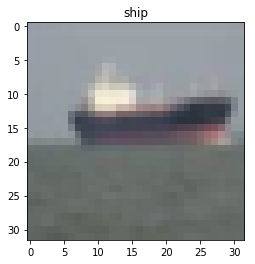

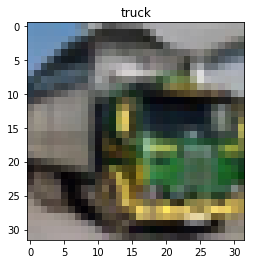

In [141]:
# Function that gets an integer and plots the corrsponding column of the data
def cifar10_show(pic_num):
    im = np.reshape(data[pic_num], (32,32,3), order='F')
    plt.figure()
    plt.imshow(np.transpose(im,(1,0,2)))
    plt.title(LABELS[labels[pic_num]])
    plt.show()

for im in range(0,len(LABELS)) :
    this_label = LABELS[im]
    image_numbers =np.asarray(np.where(labels==im))
#     print((image_numbers))
    pic_num = image_numbers[0][2]
    cifar10_show(pic_num)


3) Split the data into 80% training and 20% testing using "train_test"split" command from scikit-learn.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.2, random_state=0)

# 1) K-nearest neighbor classifier:

Implement k-nearest neighbor classifier for k=1,2. Print the training and test accuracies (it takes a while to run)  (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [86]:
# standardization = preprocessing.StandardScaler()
# standardization.fit(X_train)
# X_train_standardized = standardization.transform(X_train)
# X_test_standardized  = standardization.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [144]:
training_accuracy = []
test_accuracy = []
for k in range(1,3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    accuracy_train = neigh.score(X = X_train, y = y_train)
    accuracy_test = neigh.score(X_test,y_test)
    training_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

In [145]:
training_accuracy

[1.0, 0.592625]

In [146]:
test_accuracy

[0.2695, 0.249]

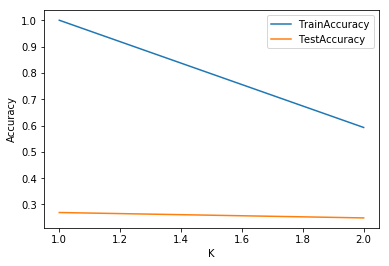

In [147]:
kValues = [j for j in range(1,3)]
plt.plot(kValues, training_accuracy, kValues, test_accuracy)
plt.gca().legend(('TrainAccuracy', 'TestAccuracy'))
plt.xlabel('K')
plt.ylabel('Accuracy')

# 2) Nearest centroid classifier:

Implement nearest centroid classifier. What are the training/test accuracies? (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html).

In [151]:
training_accuracy = []
test_accuracy = []
train_data = X_train
test_data = X_test
nCentroid = NearestCentroid(metric = 'euclidean')
nCentroid.fit(train_data,y_train)
accuracy_train = nCentroid.score(X = train_data, y = y_train)
accuracy_test = nCentroid.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [152]:
training_accuracy

[0.27325]

In [153]:
test_accuracy

[0.277]

# 3) Gaussian Naive Bayes classifier:

Implement Gaussian naive Bayes classifier and report the training and test accuracies (http://scikit-learn.org/stable/modules/naive_bayes.html).

In [148]:
training_accuracy = []
test_accuracy = []
train_data = X_train
test_data = X_test
gnb = GaussianNB()
gnb.fit(train_data,y_train)
accuracy_train = gnb.score(X = train_data, y = y_train)
accuracy_test = gnb.score(test_data,y_test)
training_accuracy.append(accuracy_train)
test_accuracy.append(accuracy_test)

In [149]:
training_accuracy

[0.29025]

In [150]:
test_accuracy

[0.291]